In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("datasets\Gurgaon\Flats\properties_post_feature_selection.csv")

In [4]:
df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48


In [6]:
X = df.drop(columns=['price'])
y = df['price']

In [7]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR

#### Visualizing and Transforming the price column

C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\rawat\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


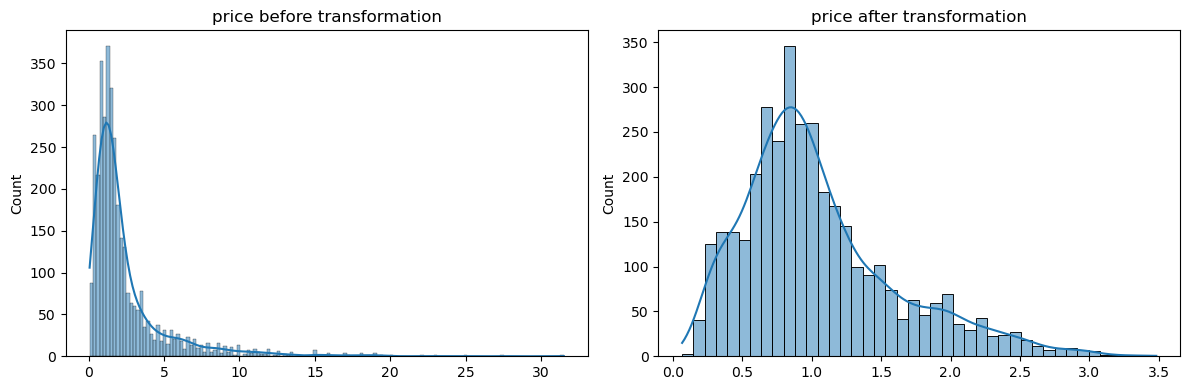

In [17]:
# visualizing price column
fig, axs = plt.subplots(1,2, figsize=(12,4))
sns.histplot(y, kde=True, ax=axs[0])
axs[0].set_title("price before transformation")
axs[0].set_xlabel("")
sns.histplot(y_transformed, kde=True, ax=axs[1])
axs[1].set_title("price after transformation")
axs[1].set_xlabel("")
plt.tight_layout()
plt.show()

In [18]:
# transforming price column
y_transformed = np.log1p(y)

#### Column Transformer

In [ ]:
columns_to_encode = ['sector', 'balcony', 'agePossession', 'furnishing_type', 'luxury_category', 'floor_category']

In [19]:
# Creating a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['property_type', 'bedRoom', 'bathroom', 'built_up_area', 'servant room', 'store room']),
        ('cat', OneHotEncoder(drop='first'), columns_to_encode)
    ], 
    remainder='passthrough'
)

In [20]:
# creating pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", SVR(kernel="rbf"))
])

In [23]:
# k fold cross validations
k_folds = KFold(n_splits=10, shuffle=True, random_state=42)
scores = cross_val_score(pipeline, X, y_transformed, cv=k_folds, scoring="r2")

In [24]:
scores.mean(), scores.std()

(0.8845058204018443, 0.014684904206760718)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_transformed,test_size=0.2,random_state=42)

In [26]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['property_type', 'bedRoom',
                                                   'bathroom', 'built_up_area',
                                                   'servant room',
                                                   'store room']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['sector', 'balcony',
                                                   'agePossession',
                                                   'furnishing_type',
                                                   'luxury_category',
                                                   'floor_category'])])),
                ('regressor', SVR())])

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

y_pred = pipeline.predict(X_test)
y_pred = np.expm1x(y_pred)

In [29]:
mean_absolute_error(np.expm1(y_test), y_pred), mean_squared_error(np.expm1(y_test), y_pred)

(0.5300039958796366, 1.3654764892575988)

In [ ]:
# post_feature_selection_v2.csv, visualization.ipny, profiling.ipny, insight modele, latlong.csv, model selection,
